In [17]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
digits=load_digits()
print(dir(digits))

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']


In [18]:
data = pd.DataFrame(digits.data)
target=pd.DataFrame(digits.target)
print(data.shape)
data.head()

(1797, 64)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


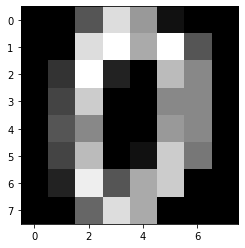

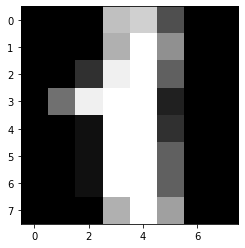

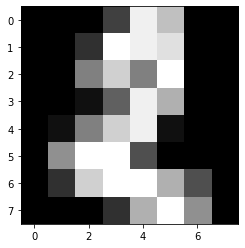

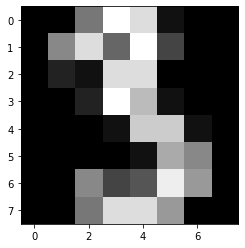

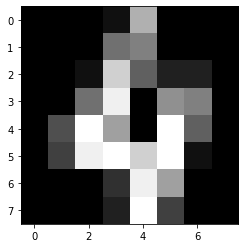

In [28]:
#data plotting using matplotlib
for sample in range(0,5):
    image = np.array(data.loc[sample,:]).reshape(8,8)# plot the sample
    fig = plt.figure
    plt.imshow(image, cmap='gray')
    plt.show()

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [31]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.20, random_state=42)
print(x_train.shape, x_test.shape)

(1437, 64) (360, 64)


In [33]:
track=dict()
for i in range(5,25):
    rf=RandomForestClassifier(n_estimators=i)
    rf.fit(x_train,y_train)
    track[i]=rf.score(x_test,y_test)
print(track)
    
    

/home/akhtar/anaconda3/envs/jupyter/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/home/akhtar/anaconda3/envs/jupyter/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/home/akhtar/anaconda3/envs/jupyter/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/home/akhtar/anaconda3/envs/jupyter/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 

{5: 0.9444444444444444, 6: 0.9416666666666667, 7: 0.9361111111111111, 8: 0.9611111111111111, 9: 0.9444444444444444, 10: 0.9722222222222222, 11: 0.9666666666666667, 12: 0.9527777777777777, 13: 0.9666666666666667, 14: 0.95, 15: 0.9638888888888889, 16: 0.9638888888888889, 17: 0.9638888888888889, 18: 0.9694444444444444, 19: 0.9694444444444444, 20: 0.9722222222222222, 21: 0.9722222222222222, 22: 0.975, 23: 0.9583333333333334, 24: 0.9694444444444444}


/home/akhtar/anaconda3/envs/jupyter/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/home/akhtar/anaconda3/envs/jupyter/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [34]:
#best n_estimator value is 20 or 21 
rf=RandomForestClassifier(n_estimators=20)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)


/home/akhtar/anaconda3/envs/jupyter/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


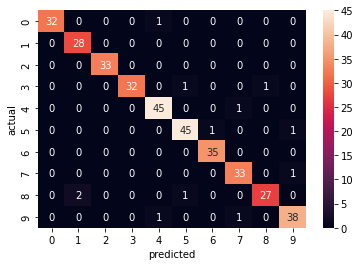

In [44]:
cm=confusion_matrix(y_test,y_pred)
import seaborn as sns
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [41]:
import seaborn as sns

/home/akhtar/anaconda3/envs/jupyter/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
